# Data Preparation

In order for an ML model to learn, it needs data. The question is, how do we feed it the data?

<br>

This is where the data class and dataloader come into play.

# Data Class

The data class is the backbone of any pytorch pipeline.

<br>

A data class requires 3 methods, `__init__()`, `__len__()` and `__getitem__()`

The `__init__()` function loads data from your drive, preprocesses any data, and allows you to define any specific variables you may need.

The `__len__()` function tells the model how much data you have. It must return an int.

Finally, the `__getitem__()` function returns a specific item at an index. This is how a model actually gets the data. It should return a tuple consisting of `(features, label)`.

<br>

We'll start off with an example with a fake dataset.


In [9]:
# import the necessary modules
import torch
from torch.utils.data import Dataset

# since google colab does not have persistant file storage
# i'll create fake image data

class fakeDataset(Dataset):
  def __init__(self):
    self.features = torch.randn(200, 200, 200, 3) # 200 images that are 200x200 with 3 color channels
    self.labels = torch.randint(0, 2, (200,)) # labels are either 0 or 1

  def __len__(self):
    return len(self.labels)

  def __getitem__(self, idx): # getitem requires the idx parameter
    self.features[idx].clamp_(0, 1)
    return (self.features[idx], self.labels[idx])


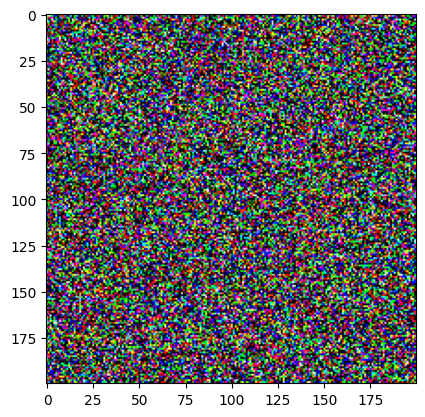

In [10]:
# lets visualize what we created
import matplotlib.pyplot as plt

dataset = fakeDataset()

img, label = dataset[0] # getitem allows us to use [] notation to get images

plt.imshow(img)
plt.show()

# Your turn

Create a data class for the mnist dataset.

Download it [here](https://git-disl.github.io/GTDLBench/datasets/mnist_datasets/).

Load an image similar to how I did above to confirm your solution.

<br>

Hint, create a directory of the images and pass the directory to your `__init__()` function as a parameter.


In [ ]:
# your data class here

# Dataloaders

Now that we have a class, we need something to load the data from memory into our model. This is where the dataloader comes in.

Dataloaders are much simpler than data classes.

<br>

Lets make an example dataloader with our previously created data class

In [30]:
# import necessary module
from torch.utils.data import DataLoader

dl = DataLoader(dataset, batch_size=2, shuffle=True) # batch size is the number of images fed to the model at a time

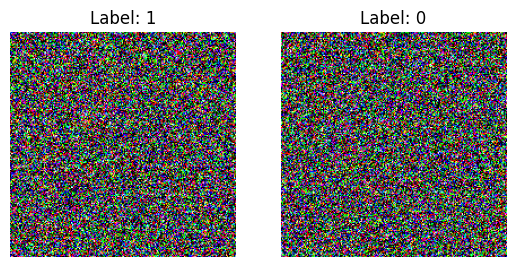

In [31]:
dl_img, dl_label = next(iter(dl))

# rerunning this cell multiple times shows different images
# notice that since our batch size is 2 we see 2 images
# try changing the batch size
for i in range(dl_img.shape[0]):
    img = dl_img[i]
    plt.subplot(1, dl_img.shape[0], i + 1)
    plt.imshow(img.numpy())
    plt.title(f"Label: {dl_label[i].item()}")
    plt.axis('off')


# Your Turn

Now I want you to create a dataloader for the mnist dataset. Pick a batch size and display it.

In [ ]:
# your code goes here